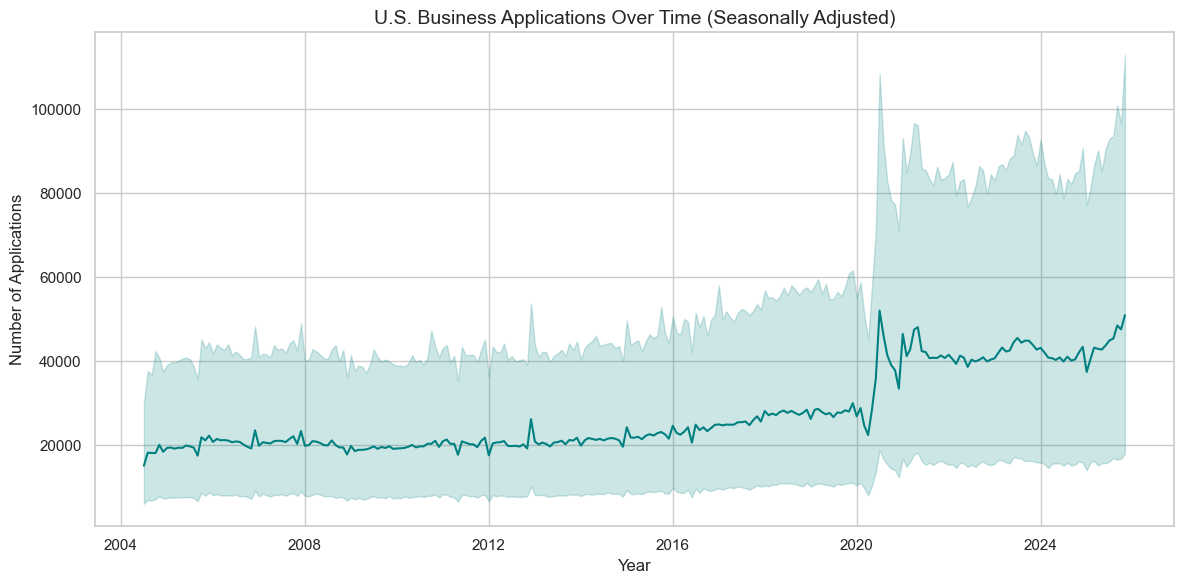


--- Summary Statistics for National Applications ---
count      5397.00
mean      27243.46
std       63263.79
min         106.00
25%        4458.00
50%       11190.00
75%       22740.00
max      546415.00
Name: count, dtype: float64


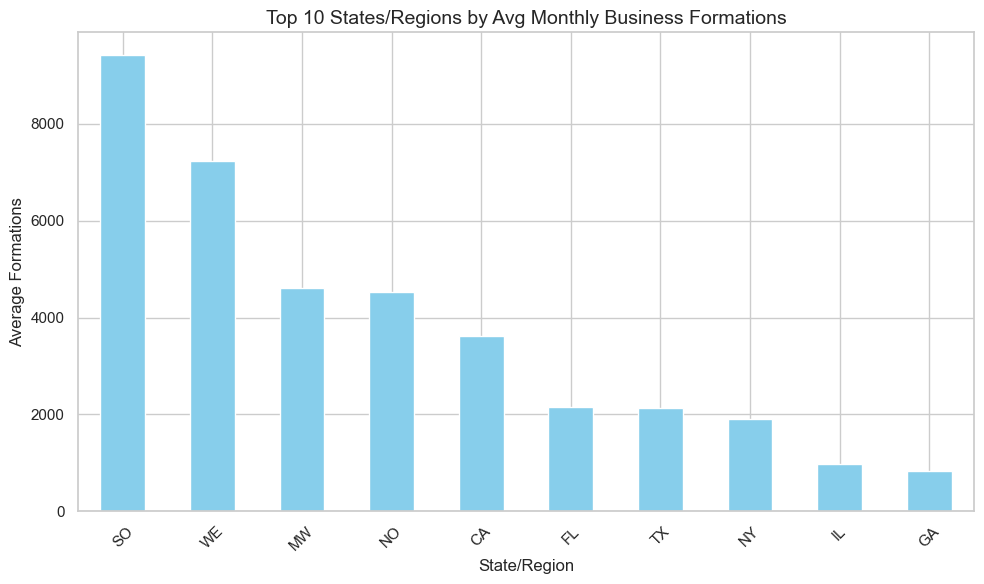


--- Top 10 State/Region Averages ---
geo
SO    9419.723810
WE    7227.152381
MW    4618.661905
NO    4533.885714
CA    3626.714286
FL    2156.480952
TX    2126.628571
NY    1910.028571
IL     973.638095
GA     833.580952
Name: count, dtype: float64


In [2]:
"""
BFS Analysis Project
Created: January 2026
Author: Dhyan Palanichamy
Description: This script cleans and analyzes US Census BFS data
following CRISP-DM and PEP8 standards.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set visual aesthetics
sns.set_theme(style="whitegrid")

def load_and_prepare_data(file_path):
    """
    Data Understanding & Preparation:
    Loads the BFS csv, melts the monthly columns into a long format,
    and converts time data into datetime objects.
    """
    try:
        # GATHER: Loading the data with encoding fallback for CSVs
        df = pd.read_csv(file_path, encoding='utf-8')

        # Define month columns for melting
        months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                  'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

        # CLEAN: Transform wide to long format (DRY Principle)
        df_melted = pd.melt(
            df,
            id_vars=['sa', 'naics_sector', 'series', 'geo', 'year'],
            value_vars=months,
            var_name='month_name',
            value_name='count'
        )

        # Mapping month names to integers
        month_map = {m: i+1 for i, m in enumerate(months)}
        df_melted['month_num'] = df_melted['month_name'].map(month_map)

        # Create a proper date column
        df_melted['date'] = pd.to_datetime(
            df_melted['year'].astype(str) + '-' +
            df_melted['month_num'].astype(str) + '-01',
            errors='coerce'
        )

        # CLEAN: Handle missing/null values
        df_cleaned = df_melted.dropna(subset=['date', 'count']).copy()
        df_cleaned['count'] = pd.to_numeric(df_cleaned['count'], errors='coerce')

        return df_cleaned

    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

def plot_national_trends(df):
    """
    Question 1: Trend of business applications (National).
    """
    national_apps = df[
        (df['geo'] == 'US') &
        (df['sa'] == 'A') &
        (df['series'] == 'BA_BA')
    ]

    if not national_apps.empty:
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=national_apps, x='date', y='count', color='teal')
        plt.title("U.S. Business Applications Over Time (Seasonally Adjusted)", fontsize=14)
        plt.xlabel("Year")
        plt.ylabel("Number of Applications")
        plt.tight_layout()
        plt.show()

        print("\n--- Summary Statistics for National Applications ---")
        print(national_apps['count'].describe().round(2))
    else:
        print("Warning: National application data (BA_BA) not found.")

def analyze_state_performance(df):
    """
    Question 2: Average formations by state.
    """
    formations = df[
        (df['series'] == 'BF_BF4Q') &
        (df['sa'] == 'A') &
        (df['geo'] != 'US')
    ]

    if not formations.empty:
        state_stats = formations.groupby('geo')['count'].mean().sort_values(ascending=False).head(10)

        plt.figure(figsize=(10, 6))
        state_stats.plot(kind='bar', color='skyblue')
        plt.title("Top 10 States/Regions by Avg Monthly Business Formations", fontsize=14)
        plt.ylabel("Average Formations")
        plt.xlabel("State/Region")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        return state_stats
    return None

# --- Main Execution ---
if __name__ == "__main__":
    # Use a relative path so it works on any machine
    # Assumes bfs_monthly.csv is in the same folder as the script
    DATA_FILE = "bfs_monthly.csv"

    # Step 1: Gather and Clean
    processed_data = load_and_prepare_data(DATA_FILE)

    if processed_data is not None:
        # Step 2: National Trend Analysis
        plot_national_trends(processed_data)

        # Step 3: State Comparison Analysis
        top_10_states = analyze_state_performance(processed_data)

        if top_10_states is not None:
            print("\n--- Top 10 State/Region Averages ---")
            print(top_10_states)